## 1. Data preparation

#### 1.a Add Country Name

In [1]:
import pandas as pd
import numpy as np
df_countries = pd.read_html('https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2')[2]
df_countries = df_countries[['Code', 'Country name (using title case)']]
df_countries.rename(columns={'Code':'Country','Country name (using title case)':'Country name'},inplace=True)
df_countries.to_csv ('../data/countries.csv', index = False, header=True)
df_countries = pd.read_csv('../data/countries.csv')

In [2]:
df_countries

,Country,Country name
0,AD,Andorra
1,AE,United Arab Emirates
2,AF,Afghanistan
3,AG,Antigua and Barbuda
4,AI,Anguilla
...,...,...
244,YE,Yemen
245,YT,Mayotte
246,ZA,South Africa
247,ZM,Zambia


#### 1.b Air quality data of 2019

In [5]:

df_2019Q1 = pd.read_csv('data/air_quality/2019Q1.csv', skiprows=4, engine='python')
df_2019Q2 = pd.read_csv('data/air_quality/2019Q2.csv', skiprows=4, engine='python')
df_2019Q3 = pd.read_csv('data/air_quality/2019Q3.csv', skiprows=4, engine='python')
df_2019Q4 = pd.read_csv('data/air_quality//2019Q4.csv', skiprows=4, engine='python')
df_2019 = pd.concat([df_2019Q1, df_2019Q2, df_2019Q3, df_2019Q4])
df_2019['Date'] = pd.to_datetime(df_2019['Date'])

#### 1.c Air quality data of 2020

In [7]:
df_2020Q1 = pd.read_csv('data/air_quality/2020Q1.csv', skiprows=4, engine='python')
df_2020Q2 = pd.read_csv('data/air_quality/2020Q2.csv', skiprows=4, engine='python')
df_2020Q3 = pd.read_csv('data/air_quality/2020Q3.csv', skiprows=4, engine='python')
df_2020Q4 = pd.read_csv('data/air_quality/2020Q4.csv', skiprows=4, engine='python')
df_2020 = pd.concat([df_2020Q1, df_2020Q2, df_2020Q3, df_2020Q4])
df_2020['Date'] = pd.to_datetime(df_2020['Date'])

#### 1.d Merge the data of 2019 and 2020 and filter on India Data

In [8]:
df_2019_2020 = pd.concat([df_2019, df_2020])
df = pd.merge(df_2019_2020,df_countries, on='Country')
df_india = df[df['Country name'] == 'India']

In [11]:
df_india.shape

(175194, 10)

In [12]:
df_india

,Date,Country,City,Specie,count,min,max,median,variance,Country name
495704,2019-01-25,IN,New Delhi,temperature,24,8.1,16.5,10.9,70.07,India
495705,2019-03-15,IN,New Delhi,temperature,24,11.2,23.3,15.5,199.22,India
495706,2019-01-05,IN,New Delhi,temperature,24,7.6,15.3,10.8,82.07,India
495707,2019-01-19,IN,New Delhi,temperature,24,8.0,20.1,10.7,194.17,India
495708,2019-03-21,IN,New Delhi,temperature,24,15.6,28.5,19.3,219.36,India
...,...,...,...,...,...,...,...,...,...,...
670893,2020-11-20,IN,Kolkata,humidity,260,52.0,99.1,78.0,2236.17,India
670894,2020-09-29,IN,Kolkata,humidity,214,57.5,99.0,89.0,1453.01,India
670895,2020-10-29,IN,Kolkata,humidity,264,50.8,96.3,75.1,1423.20,India
670896,2020-11-29,IN,Kolkata,humidity,264,30.5,98.9,66.5,3667.41,India


#### 1.e Get Lockdown Data

In [9]:
df_lockdown_dates = pd.read_csv('data/lockdown_dates_wikipedia.csv', engine='python')
df_lockdown_dates.rename(columns={'country_territory':'Country name'},inplace=True)

df_lockdown_dates_india = df_lockdown_dates[df_lockdown_dates['Country name'] == 'India']
df_lockdown_dates_india.drop('country_code', axis=1, inplace=True)

df_india_final = pd.merge(df_india, df_lockdown_dates_india, on='Country name')
df_india_final.head()

/Users/raouaa/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date,Country,City,Specie,count,min,max,median,variance,Country name,...,sixth_lockdown_end_date,sixth_lockdown_length,seventh_lockdown_start_date,seventh_lockdown_end_date,seventh_lockdown_length,eighth_lockdown_start_date,eighth_lockdown_end_date,eighth_lockdown_length,total_length,level
0,2019-01-25,IN,New Delhi,temperature,24,8.1,16.5,10.9,70.07,India,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74,National
1,2019-01-25,IN,New Delhi,temperature,24,8.1,16.5,10.9,70.07,India,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,Region
2,2019-01-25,IN,New Delhi,temperature,24,8.1,16.5,10.9,70.07,India,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,Region
3,2019-01-25,IN,New Delhi,temperature,24,8.1,16.5,10.9,70.07,India,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,State
4,2019-01-25,IN,New Delhi,temperature,24,8.1,16.5,10.9,70.07,India,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,State


In [14]:
df_india_final.tail()

,Date,Country,City,Specie,count,min,max,median,variance,Country name,...,sixth_lockdown_end_date,sixth_lockdown_length,seventh_lockdown_start_date,seventh_lockdown_end_date,seventh_lockdown_length,eighth_lockdown_start_date,eighth_lockdown_end_date,eighth_lockdown_length,total_length,level
1401547,2020-12-25,IN,Kolkata,humidity,264,32.5,99.7,74.0,4542.17,India,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,State
1401548,2020-12-25,IN,Kolkata,humidity,264,32.5,99.7,74.0,4542.17,India,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,State
1401549,2020-12-25,IN,Kolkata,humidity,264,32.5,99.7,74.0,4542.17,India,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,State
1401550,2020-12-25,IN,Kolkata,humidity,264,32.5,99.7,74.0,4542.17,India,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,State
1401551,2020-12-25,IN,Kolkata,humidity,264,32.5,99.7,74.0,4542.17,India,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,State


In [13]:
df_india_final.shape

(1401552, 37)

#### 1.f Clean Lockdown data

In [19]:
lockdown= pd.read_csv('data/lockdown_dates_wikipedia.csv', engine='python')
lockdown_india=lockdown[lockdown['country_territory']=='India'].reset_index(drop=True)
lockdown_india

array(['Nationwide', 'Bengaluru', 'Delhi', 'Haryana', 'Maharashtra',
       'Odisha', 'Rajasthan', 'Uttar Pradesh'], dtype=object)

In [ ]:
# let drop all column with zero non-null
lockdown_india.drop(['third_lockdown_start_date', 'third_lockdown_end_date',
       'third_lockdown_length', 'fourth_lockdown_start_date',
       'fourth_lockdown_end_date', 'fourth_lockdown_length',
       'fifth_lockdown_start_date', 'fifth_lockdown_end_date',
       'fifth_lockdown_length', 'sixth_lockdown_start_date',
       'sixth_lockdown_end_date', 'sixth_lockdown_length',
       'seventh_lockdown_start_date', 'seventh_lockdown_end_date',
       'seventh_lockdown_length', 'eighth_lockdown_start_date',
       'eighth_lockdown_end_date', 'eighth_lockdown_length'],inplace=True, axis=1)
lockdown_india

In [41]:
#converting date to dateformat
#df_2019_2020_lockdown_india['Date'] = pd.to_datetime(df_2019_2020_lockdown_india['Date'])
lockdown_india['first_lockdown_start_date'] = pd.to_datetime(lockdown_india['first_lockdown_start_date'])
lockdown_india['first_lockdown_end_date'] = pd.to_datetime(lockdown_india['first_lockdown_end_date'])
lockdown_india['second_lockdown_start_date'] = pd.to_datetime(lockdown_india['second_lockdown_start_date'])
lockdown_india['second_lockdown_end_date'] = pd.to_datetime(lockdown_india['second_lockdown_end_date'])
lockdown_india

,country_territory,country_code,place,first_lockdown_start_date,first_lockdown_end_date,first_lockdown_length,second_lockdown_start_date,second_lockdown_end_date,second_lockdown_length,total_length,level
0,India,IN,Nationwide,2020-03-25,2020-06-07,74,NaT,NaT,NaN,74,National
1,India,IN,Bengaluru,NaT,NaT,NaN,2021-04-27,2021-05-09,12,12,Region
2,India,IN,Delhi,NaT,NaT,NaN,2021-04-19,2021-05-31,42,42,Region
3,India,IN,Haryana,NaT,NaT,NaN,2021-05-03,2021-05-10,7,7,State
4,India,IN,Maharashtra,NaT,NaT,NaN,2021-04-14,2021-06-15,62,62,State
5,India,IN,Odisha,NaT,NaT,NaN,2021-05-05,2021-05-19,14,14,State
6,India,IN,Rajasthan,NaT,NaT,NaN,2021-05-10,2021-06-08,29,29,State
7,India,IN,Uttar Pradesh,NaT,NaT,NaN,2021-04-30,2021-05-10,10,10,State


In [42]:
# converting lockdown length to float
lockdown_india['first_lockdown_length']=lockdown_india['first_lockdown_length'].astype(float)
lockdown_india['second_lockdown_length']=lockdown_india['second_lockdown_length'].astype(float)
lockdown_india['total_length']=lockdown_india['total_length'].astype(float)

In [46]:
lockdown_india

,country_territory,country_code,place,first_lockdown_start_date,first_lockdown_end_date,first_lockdown_length,second_lockdown_start_date,second_lockdown_end_date,second_lockdown_length,total_length,level
0,India,IN,Nationwide,2020-03-25,2020-06-07,74.0,NaT,NaT,NaN,74.0,National
1,India,IN,Bengaluru,NaT,NaT,NaN,2021-04-27,2021-05-09,12.0,12.0,Region
2,India,IN,Delhi,NaT,NaT,NaN,2021-04-19,2021-05-31,42.0,42.0,Region
3,India,IN,Haryana,NaT,NaT,NaN,2021-05-03,2021-05-10,7.0,7.0,State
4,India,IN,Maharashtra,NaT,NaT,NaN,2021-04-14,2021-06-15,62.0,62.0,State
5,India,IN,Odisha,NaT,NaT,NaN,2021-05-05,2021-05-19,14.0,14.0,State
6,India,IN,Rajasthan,NaT,NaT,NaN,2021-05-10,2021-06-08,29.0,29.0,State
7,India,IN,Uttar Pradesh,NaT,NaT,NaN,2021-04-30,2021-05-10,10.0,10.0,State


In [47]:

FirstLockdown=list(pd.date_range(start='2020-03-25', end='2020-06-06'))
Secondlockdown=list(pd.date_range(start='2021-04-14', end='2021-06-14'))
lockdown1_2=FirstLockdown + Secondlockdown

In [50]:
df_india

,Date,Country,City,Specie,count,min,max,median,variance,Country name
495704,2019-01-25,IN,New Delhi,temperature,24,8.1,16.5,10.9,70.07,India
495705,2019-03-15,IN,New Delhi,temperature,24,11.2,23.3,15.5,199.22,India
495706,2019-01-05,IN,New Delhi,temperature,24,7.6,15.3,10.8,82.07,India
495707,2019-01-19,IN,New Delhi,temperature,24,8.0,20.1,10.7,194.17,India
495708,2019-03-21,IN,New Delhi,temperature,24,15.6,28.5,19.3,219.36,India
...,...,...,...,...,...,...,...,...,...,...
670893,2020-11-20,IN,Kolkata,humidity,260,52.0,99.1,78.0,2236.17,India
670894,2020-09-29,IN,Kolkata,humidity,214,57.5,99.0,89.0,1453.01,India
670895,2020-10-29,IN,Kolkata,humidity,264,50.8,96.3,75.1,1423.20,India
670896,2020-11-29,IN,Kolkata,humidity,264,30.5,98.9,66.5,3667.41,India


In [51]:
df_india_new = df_india.copy()

In [52]:
FirstL=df_india_new[df_india_new['Date'].isin(FirstLockdown)]
SecondL=df_india_new[df_india_new['Date'].isin(Secondlockdown)]
nolockdown=df_india_new[~df_india_new['Date'].isin(lockdown1_2)]

In [56]:
FirstL['lockdown']=1
SecondL['lockdown']=1
nolockdown['lockdown']=0

<ipython-input-56-b8d42db978e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FirstL['lockdown']=1
<ipython-input-56-b8d42db978e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nolockdown['lockdown']=0


In [57]:
FirstL

,Date,Country,City,Specie,count,min,max,median,variance,Country name,lockdown
575546,2020-04-04,IN,Thrissur,so2,61,1.0,10.0,3.1,99.88,India,1
575553,2020-04-02,IN,Thrissur,so2,65,1.7,10.0,3.0,79.42,India,1
575566,2020-04-01,IN,Thrissur,so2,72,1.7,14.3,2.4,211.66,India,1
575572,2020-03-29,IN,Thrissur,so2,41,1.7,14.4,3.6,255.31,India,1
575579,2020-03-31,IN,Thrissur,so2,72,1.7,15.0,2.6,242.98,India,1
...,...,...,...,...,...,...,...,...,...,...,...
622172,2020-05-02,IN,Kolkata,wind-speed,261,0.0,4.1,0.3,7.74,India,1
622173,2020-05-12,IN,Kolkata,wind-speed,198,0.0,4.3,0.5,8.43,India,1
622174,2020-05-18,IN,Kolkata,wind-speed,181,0.0,3.2,0.8,4.96,India,1
622175,2020-04-23,IN,Kolkata,wind-speed,255,0.0,6.2,0.6,13.45,India,1


In [58]:
Lockdown_df=pd.concat([FirstL,SecondL,nolockdown],axis=0)

In [59]:
Lockdown_df.sort_values(by='Date',inplace=True)

In [63]:
Lockdown_df.shape

(175194, 11)

In [66]:
Lockdown_df

,Date,Country,City,Specie,count,min,max,median,variance,Country name,lockdown
500538,2018-12-31,IN,Lucknow,temperature,92,7.0,32.8,15.5,879.42,India,0
501845,2018-12-31,IN,Hāpur,humidity,48,31.5,76.0,52.6,1795.07,India,0
507103,2018-12-31,IN,Mumbai,co,72,3.3,40.0,16.7,609.22,India,0
504064,2018-12-31,IN,Chennai,wind-gust,12,8.7,10.2,9.2,4.60,India,0
502668,2018-12-31,IN,Hāpur,no2,36,2.0,57.6,27.3,2587.05,India,0
...,...,...,...,...,...,...,...,...,...,...,...
647189,2021-01-03,IN,Thrissur,co,72,5.4,10.4,7.0,17.78,India,0
670194,2021-01-03,IN,Kolkata,pm10,212,97.0,895.0,164.0,159800.00,India,0
649284,2021-01-03,IN,Hyderabad,wind-speed,124,0.3,2.8,0.7,5.67,India,0
656067,2021-01-03,IN,Hāpur,temperature,77,29.7,35.1,31.9,26.74,India,0


In [67]:
Lockdown_df_copy = Lockdown_df.copy()
Lockdown_df_copy.set_index(Lockdown_df_copy['Date'],inplace= True)

In [68]:
Lockdown_df_copy

,Date,Country,City,Specie,count,min,max,median,variance,Country name,lockdown
Date,,,,,,,,,,,
2018-12-31,2018-12-31,IN,Lucknow,temperature,92,7.0,32.8,15.5,879.42,India,0
2018-12-31,2018-12-31,IN,Hāpur,humidity,48,31.5,76.0,52.6,1795.07,India,0
2018-12-31,2018-12-31,IN,Mumbai,co,72,3.3,40.0,16.7,609.22,India,0
2018-12-31,2018-12-31,IN,Chennai,wind-gust,12,8.7,10.2,9.2,4.60,India,0
2018-12-31,2018-12-31,IN,Hāpur,no2,36,2.0,57.6,27.3,2587.05,India,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-03,2021-01-03,IN,Thrissur,co,72,5.4,10.4,7.0,17.78,India,0
2021-01-03,2021-01-03,IN,Kolkata,pm10,212,97.0,895.0,164.0,159800.00,India,0
2021-01-03,2021-01-03,IN,Hyderabad,wind-speed,124,0.3,2.8,0.7,5.67,India,0


## 2. EDA

In [100]:
import matplotlib.pyplot as plt

def dataFrame_by_specie(specie):
    df = df_india
    df_specie = df[df['Specie']==specie]
    df_specie = df_specie[['Date', 'City', 'Specie', 'max', 'Country name']]
    return df_specie

def time_series(specie):
    
    '''A function that takes a specie and turn a specie timeseries'''
    df = dataFrame_by_specie(specie)
    df = df[['Date', 'max']]
    df = df.sort_values(by=['Date'], ascending=True)
    df = df.groupby('Date').agg({"max":np.average})
    df = df.reset_index()
    df = df[df['Date'] >= "2019-01-01"]
    df.set_index('Date',inplace=True)
    ts = df
    return(ts)
def plot_time_series_by_specie(specie):
    '''A function that plots time series specie'''
    df = dataFrame_by_specie(specie)
    df = df[['Date', 'max']]
    df = df.sort_values(by=['Date'], ascending=True)
    df = df.groupby('Date').agg({"max":np.average})
    df = df.reset_index()
    df = df[df['Date'] >= "2019-01-01"]
    df.set_index('Date',inplace=True)
    ts = df
    ax = ts.plot(title='The emission of {} from 2019 to 2020 in India'.format(specie),figsize=(16,8))
    return ax



## Plotting each Specie in the list of available species(Case study of India)

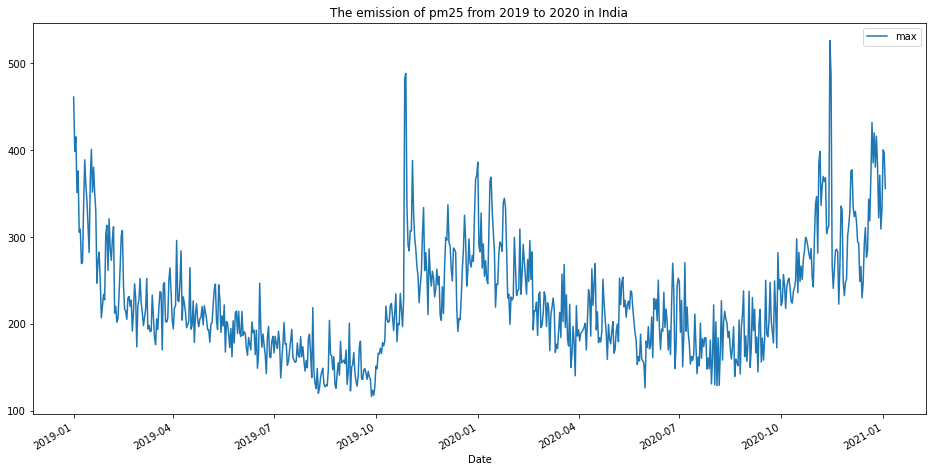

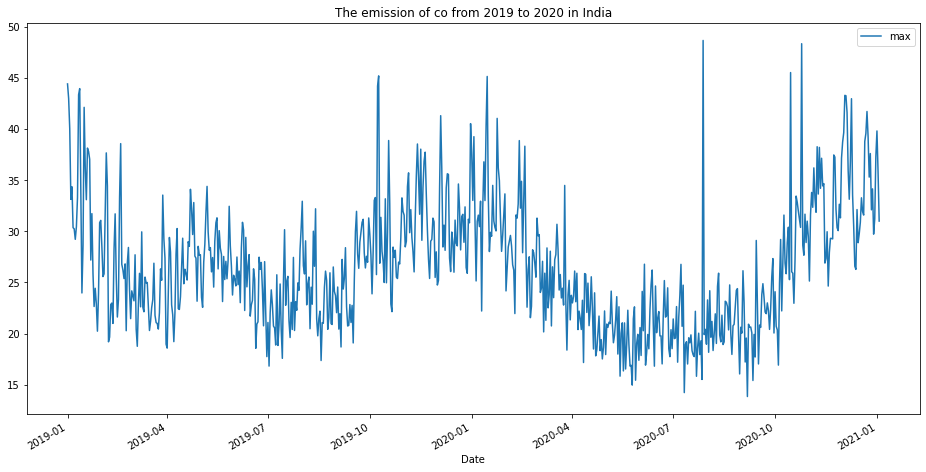

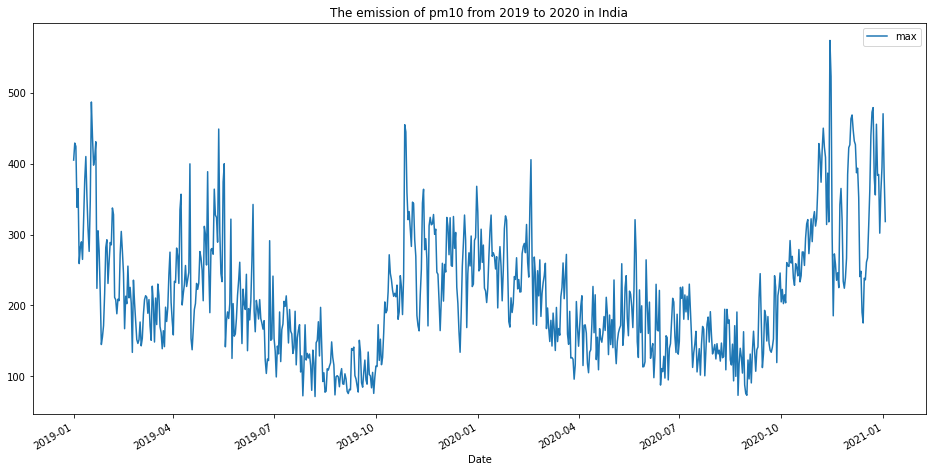

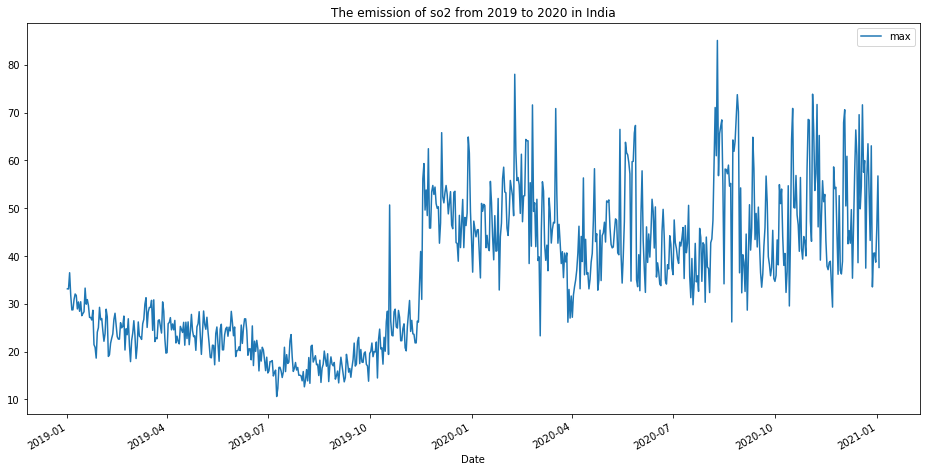

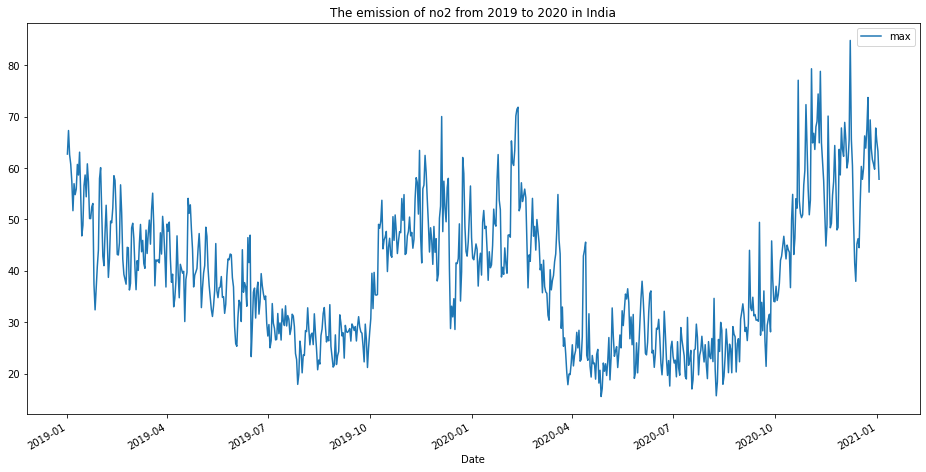

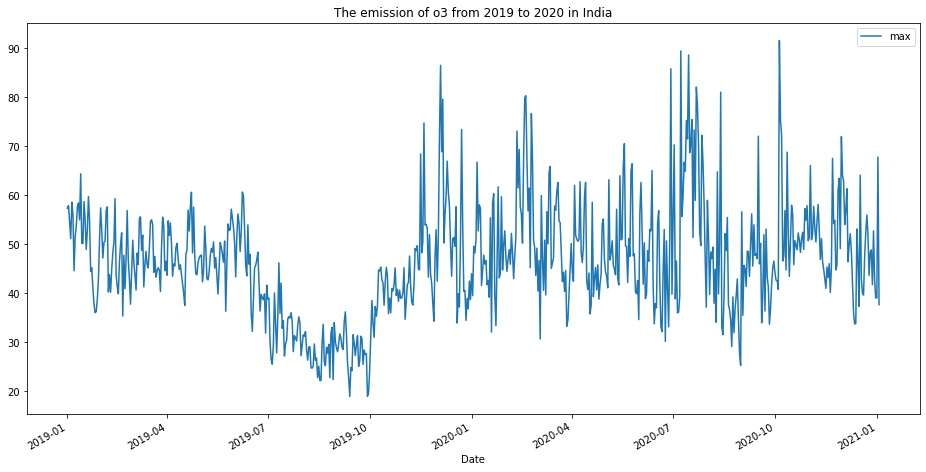

In [103]:
species = ['pm25', 'co', 'pm10', 'so2', 'no2','o3']
for specie in species:
    plot_time_series_by_specie(specie)

## Time series decomposition

<AxesSubplot:xlabel='Date'>

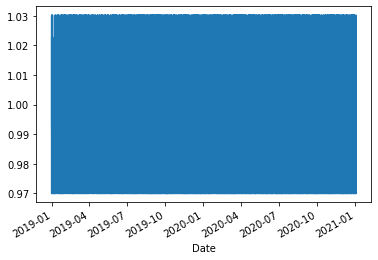

In [121]:
result.seasonal.plot()

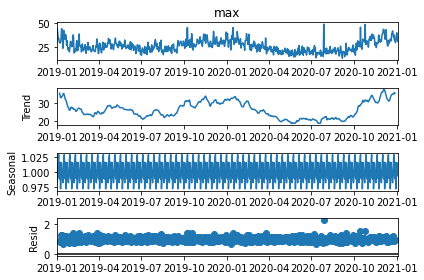

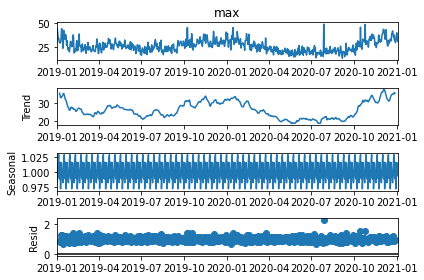

In [131]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts_co = time_series('co')
result=seasonal_decompose(ts_co['max'],  model='multiplicable',period=12)
result.plot()

<AxesSubplot:xlabel='Date'>

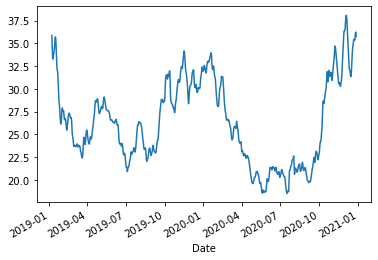

In [132]:
result.trend.plot()

## Stationarity Analysis

In [135]:
#Determing rolling statistics
rolmean = pd.Series(ts_co['max']).rolling(window=12).mean()
rolstd = pd.Series(ts_co['max']).rolling(window=12).std()

In [133]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

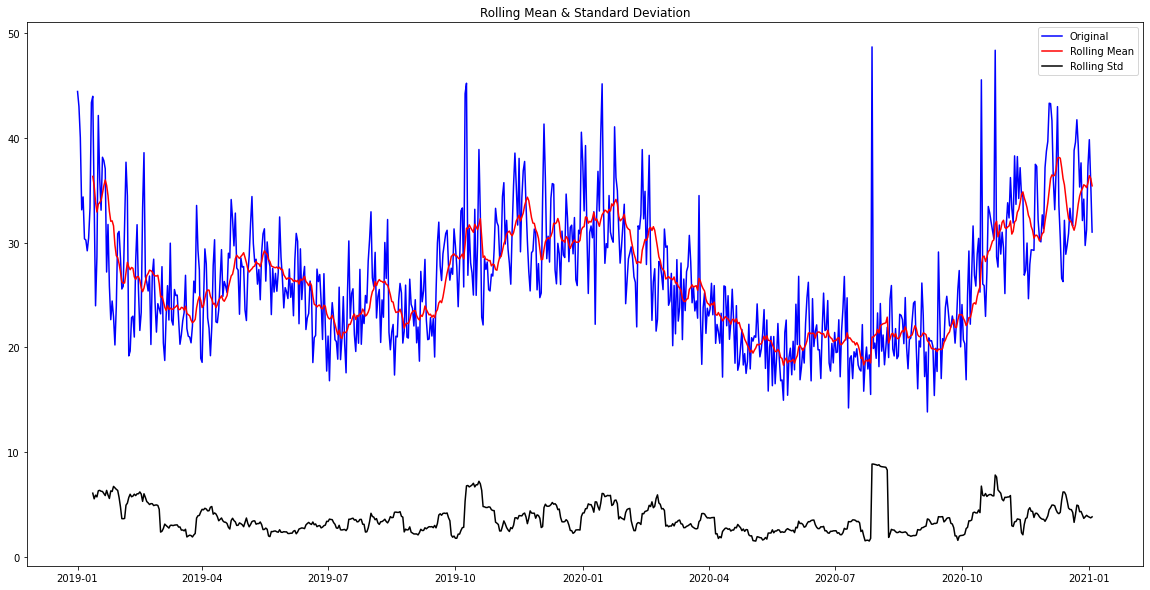

Results of Dickey-Fuller Test:
Test Statistic                  -2.118739
p-value                          0.237047
#Lags Used                      13.000000
Number of Observations Used    719.000000
Critical Value (1%)             -3.439478
Critical Value (5%)             -2.865568
Critical Value (10%)            -2.568915
dtype: float64


In [138]:
plt.figure(figsize=(20,10))
test_stationarity(ts_co['max'])

* Test Statistic > critical value => Not stationary 

### Make the time serie stationary 

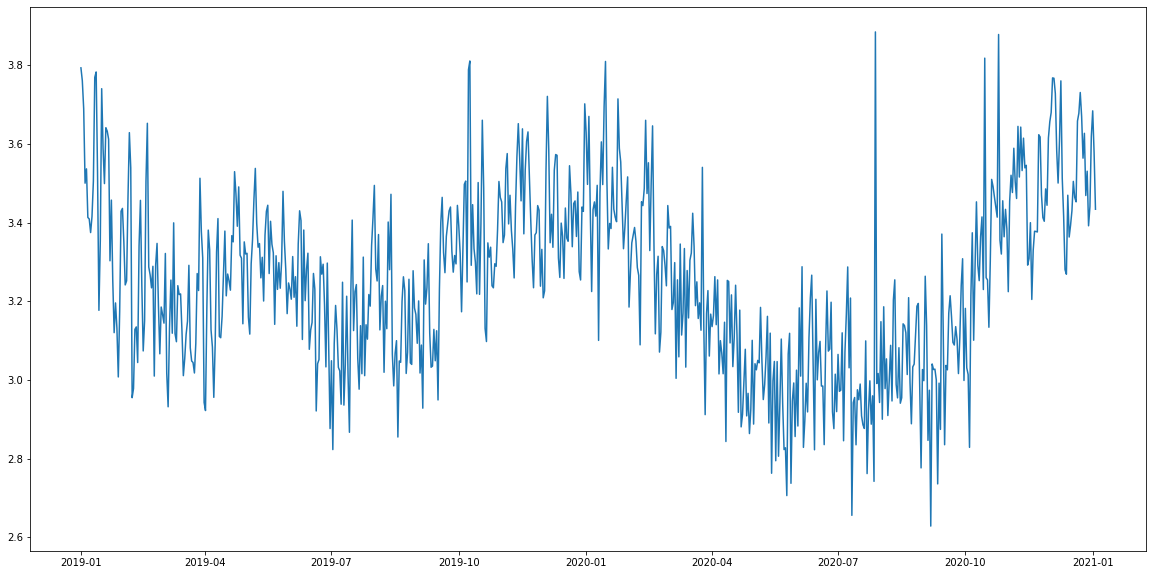

In [139]:
ts_log = np.log(ts_co['max'])
plt.figure(figsize=(20,10))
plt.plot(ts_log)

### Smoothing
#### Moving Average

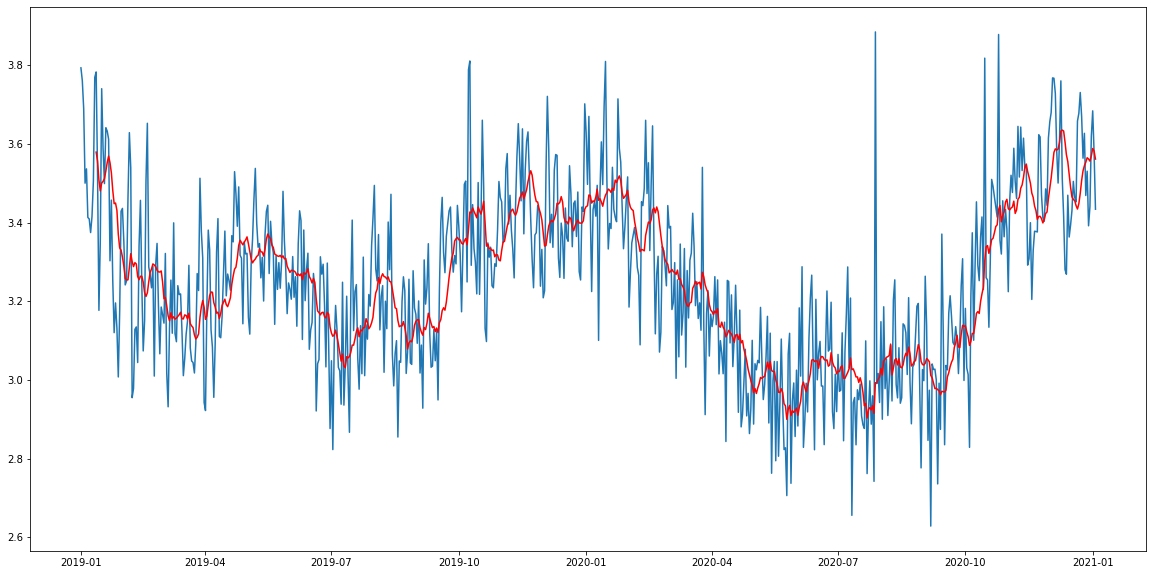

In [140]:
moving_avg = pd.Series(ts_log).rolling(12).mean()
plt.figure(figsize=(20,10))
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [141]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2019-01-01         NaN
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-05         NaN
2019-01-06         NaN
2019-01-07         NaN
2019-01-08         NaN
2019-01-09         NaN
2019-01-10         NaN
2019-01-11         NaN
2019-01-12    0.203708
Name: max, dtype: float64

In [142]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Date
2019-01-12    0.203708
2019-01-13   -0.029944
2019-01-14   -0.331279
2019-01-15   -0.125377
2019-01-16    0.239839
Name: max, dtype: float64

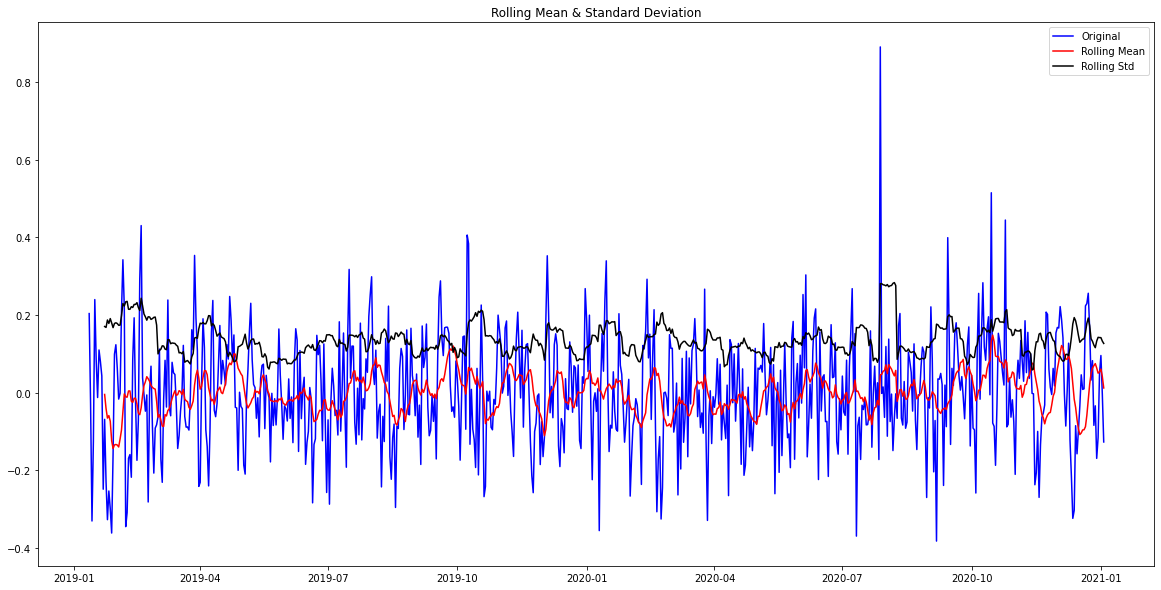

Results of Dickey-Fuller Test:
Test Statistic                -1.142396e+01
p-value                        6.766480e-21
#Lags Used                     9.000000e+00
Number of Observations Used    7.120000e+02
Critical Value (1%)           -3.439568e+00
Critical Value (5%)           -2.865608e+00
Critical Value (10%)          -2.568936e+00
dtype: float64


In [143]:
plt.figure(figsize=(20,10))
test_stationarity(ts_log_moving_avg_diff)

* Test Statistic < 1% critical value => That tells us that we are 99% confident that this series is stationary.
